In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
IMAGE_SIZE=256
BATCH_SIZE = 32

In [4]:
import numpy
print(numpy.__version__)

1.19.2


In [5]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_name= dataset.class_names
class_name
len(class_name)


3

In [7]:
for img_batch, label_batch in dataset.take(5):
    print(img_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]
(32, 256, 256, 3)
[1 0 0 1 1 0 1 0 0 1 0 2 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0]
(32, 256, 256, 3)
[1 1 1 2 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 2 2 1 0 0 1 0 1 1 2 0 1 1]
(32, 256, 256, 3)
[1 0 1 1 1 1 1 0 0 0 0 1 2 1 0 2 0 0 1 0 0 1 1 1 1 0 2 1 0 1 2 1]
(32, 256, 256, 3)
[1 1 1 0 1 0 1 0 2 1 1 1 0 0 2 2 0 0 0 0 1 0 2 0 1 0 1 0 1 0 1 0]


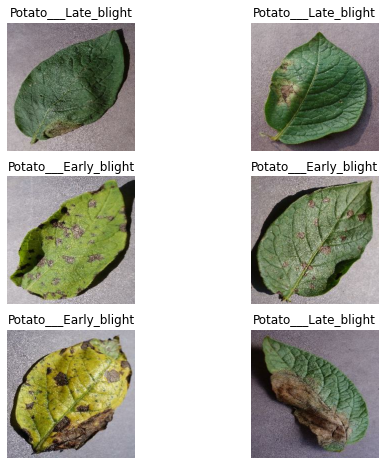

In [8]:
plt.figure(figsize=(8,8))
for img_batch, label_batch in dataset.take(5):
    for i in range(6):
        plt.subplot(3,2,i+1)
        plt.imshow(img_batch[i].numpy().astype('uint8'))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')

In [9]:
#train_size = 0.8
#len(dataset)*train_size

In [10]:


#train_dataset = dataset.take(54)
#len(train_dataset)

In [11]:
#test_dataset = dataset.skip(54)

In [12]:



#len(test_dataset)

In [13]:
#val_dataset = test_dataset.take(int(0.1*len(dataset)))

In [14]:
#len(val_dataset)

In [15]:
#test_dataset = test_dataset.skip(6)

In [16]:
def get_dataset_partitions(dataset,train_split,val_split,shuffle,shuffle_size):
    l = len(dataset)
    if shuffle:
        dataset= dataset.shuffle(shuffle_size,seed=19)
    train_size = int(l*train_split)
    train_ds = dataset.take(train_size)
    val_size = int(l*val_split)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds
        
        

In [17]:
train_ds ,val_ds, test_ds  = get_dataset_partitions(dataset,0.8,0.1,True,1000)

In [18]:
len(test_ds)


8

In [19]:
#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [20]:
scaled_model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [21]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip(),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

In [22]:
#train_ds = train_ds.map(
#   lambda x, y: (data_augmentation(x, training=True), y)
#)

In [23]:
CHANNELS=3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = tf.keras.Sequential([
    scaled_model,
    data_augmentation,
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax'),
    
])

model.build(input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [25]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [26]:
trained_model = model.fit(
    train_ds,
    batch_size= BATCH_SIZE,
    validation_data = val_ds,
    verbose=1,
    epochs=5
    )

Epoch 1/5
54/54 [==============================] - 107s 2s/step - loss: 0.7769 - accuracy: 0.6297 - val_loss: 0.8395 - val_accuracy: 0.7969
Epoch 2/5
54/54 [==============================] - 117s 2s/step - loss: 0.4605 - accuracy: 0.8210 - val_loss: 0.4564 - val_accuracy: 0.8125
Epoch 3/5
54/54 [==============================] - 118s 2s/step - loss: 0.3696 - accuracy: 0.8445 - val_loss: 0.5382 - val_accuracy: 0.8281
Epoch 4/5
54/54 [==============================] - 98s 2s/step - loss: 0.2629 - accuracy: 0.8955 - val_loss: 0.2547 - val_accuracy: 0.8802
Epoch 5/5
54/54 [==============================] - 103s 2s/step - loss: 0.2535 - accuracy: 0.9020 - val_loss: 0.1622 - val_accuracy: 0.9226


In [27]:
model.evaluate(test_ds)

8/8 [==============================] - 5s 406ms/step - loss: 0.1903 - accuracy: 0.9375


[0.1903434544801712, 0.9375]

In [28]:
EPOCHS=5
trained_model.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [29]:
trained_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']
loss = trained_model.history['loss']
val_loss= trained_model.history['val_loss']

Text(0.5, 1.0, 'Accuracy')

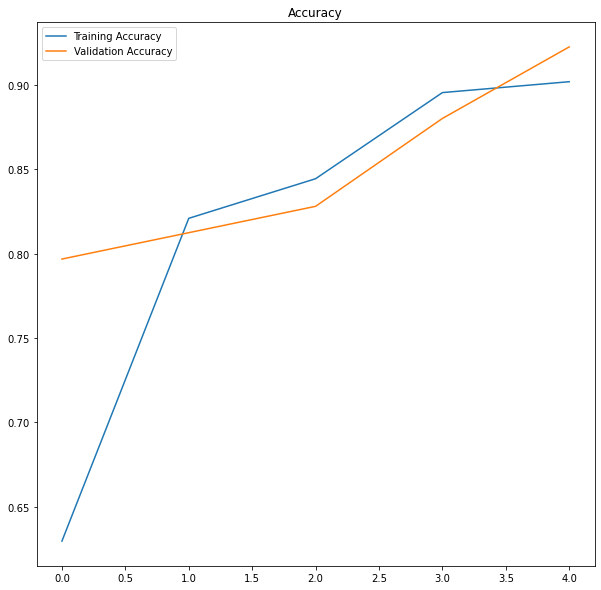

In [31]:
plt.figure(figsize=(10,10))
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")



Text(0.5, 1.0, 'Loss functions')

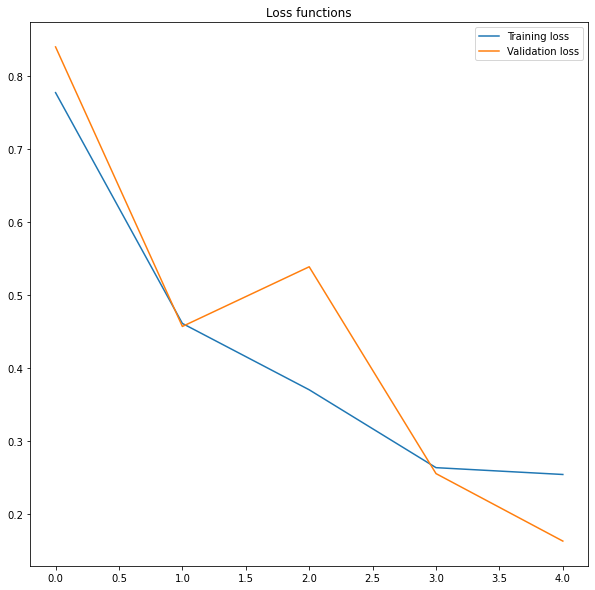

In [32]:
plt.figure(figsize=(10,10))
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend()
plt.title("Loss functions")


In [33]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    prediction = model.predict(img_array)
    predicted_class= class_name[np.argmax(prediction[0])]
    confidence = round(100 * (np.max(prediction[0])), 2)
    return predicted_class, confidence

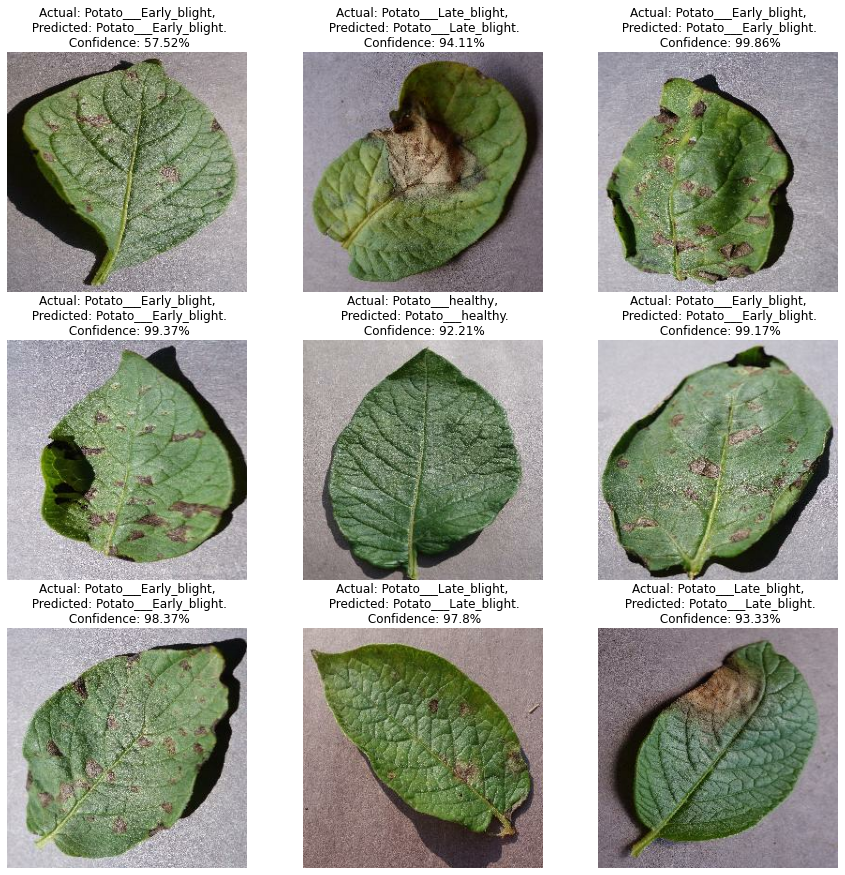

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [35]:
model_version = 1
model.save(f"../models/{model_version}")


INFO:tensorflow:Assets written to: ../models/1\assets
